In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import colorsys
import random

In [10]:
def erosion(image,diameter):
    img=np.pad(image,((diameter//2,diameter//2),(diameter//2,diameter//2)),'constant')
    out=np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            out[i,j]=np.min(img[i:i+diameter,j:j+diameter])
    return out

def dialation(image,diameter):
    img=np.pad(image,((diameter//2,diameter//2),(diameter//2,diameter//2)),'constant')
    out=np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            out[i,j]=np.max(img[i:i+diameter,j:j+diameter])
    return out
def TPA(image):
    cluster=np.zeros(image.shape,dtype=np.int64)
    count=0
 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if i==0:
                if j==0 and image[i,j]==1:
                    count=count+1
                    cluster[i,j]=count   
                else:
                    if image[i,j]==1 and image[i,j-1]==1:
                        cluster[i,j]=cluster[i,j-1]
                    elif image[i,j]==1:
                        count=count+1
                        cluster[i,j]=count
            else:
                if j==0 and image[i,j]==1 and image[i,j-1]==1:
                    cluster[i,j]=cluster[i-1,j]
                elif j==0 and image[i,j]==1:
                    count=count+1
                    cluster[i,j]=count
                elif image[i,j]==1 and image[i-1,j]==1 and image[i,j-1]==1:
                    cluster[i,j]=min(cluster[i-1,j],cluster[i,j-1])
                 
                elif image[i,j]==1 and image[i-1,j]==1 and image[i,j-1]==0:
                    cluster[i,j]=cluster[i-1,j]
                elif image[i,j]==1 and image[i-1,j]==0 and image[i,j-1]==1:
                    cluster[i,j]=cluster[i,j-1]
                elif image[i,j]==1 and image[i-1,j]==0 and image[i,j-1]==0:
                    count=count+1
                    cluster[i,j]=count
    
    mapping=np.arange(count+1)
    
    for i in range(1,image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j]==1:
                if j==0:
                    if cluster[i-1,j]!=cluster[i,j] and image[i-1,j]==1 and image[i,j]==1:
                        mapping[max(cluster[i,j],cluster[i-1,j])]=min(cluster[i,j],cluster[i-1,j])
                else:
                    if cluster[i-1,j]!=cluster[i,j] and image[i-1,j]==1 and image[i,j]==1:
                        mapping[max(cluster[i,j],cluster[i-1,j])]=min(cluster[i,j],cluster[i-1,j])
                    if cluster[i,j]!=cluster[i,j-1] and image[i,j-1]==1 and image[i,j]==1:
                        mapping[max(cluster[i,j],cluster[i,j-1])]=min(cluster[i,j],cluster[i,j-1])

    for i in range(count+1):
        if i!=mapping[i]:
            temp=i
            val=mapping[i]
            while temp!=val:
                temp=val
                val=mapping[temp]
            mapping[i]=val
    
    result=cluster.copy()      
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j]=mapping[cluster[i,j]]
    return [result,mapping]

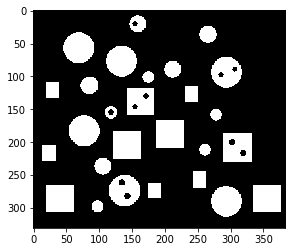

number of objects with one or more holes 6


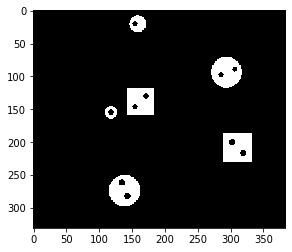

In [24]:
image=cv.imread('../images/objects.png',0)
(T,binary_image)=cv.threshold(image,128,255,cv.THRESH_BINARY)


plt.imshow(binary_image,cmap='gray')
plt.show()

binary_image=binary_image//255

#Performing Closing Operation
n_binary_image=erosion(dialation(binary_image,4),4)

[twopass_image,clustermap]=TPA(binary_image)
[n_twopass_image,clustermap]=TPA(n_binary_image)


im_unique,im_count=np.unique(twopass_image,return_counts=True)
n_im_unique,n_im_count=np.unique(n_twopass_image,return_counts=True)

object_count=0
hole_obj = np.zeros(image.shape)
for i in range(im_unique.size):
    if im_count[i]!=n_im_count[i]:
        object_count+=1
        if(i!=0):
            hole_obj[twopass_image==unique[i]]=1
print("number of objects with one or more holes",object_count-1) 
plt.imshow(hole_obj,cmap="gray")
plt.show()
# '-1' for as background was given cluster 0 do not include it

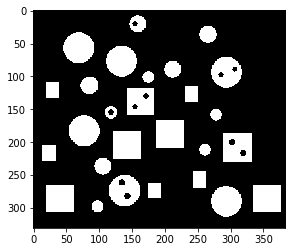

number of square objects 3


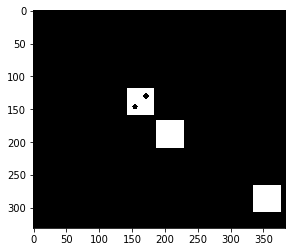

In [26]:
image=cv.imread('../images/objects.png',0)
(T,binary_image)=cv.threshold(image,128,255,cv.THRESH_BINARY)

plt.imshow(binary_image,cmap='gray')
plt.show()

binary_image=binary_image//255
[twopass_image,clustermap]=TPA(binary_image)

unique,count=np.unique(twopass_image,return_counts=True)
square_obj = np.zeros(image.shape)
rectangle_count=0
for i in range(unique.size):
    if unique[i]!=0:
        crdn=np.where(twopass_image==unique[i])
        rmin=np.min(crdn[0])
        rmax=np.max(crdn[0])
        cmin=np.min(crdn[1])
        cmax=np.max(crdn[1])
        
        if twopass_image[rmin,cmin]==unique[i]: #Implies a square
#             print(rmax-rmin,cmax-cmin)
            if rmax-rmin==cmax-cmin: 
                rectangle_count+=1
                square_obj[twopass_image==unique[i]]=1

print("number of square objects",rectangle_count)
plt.imshow(square_obj,cmap="gray")
plt.show()
        

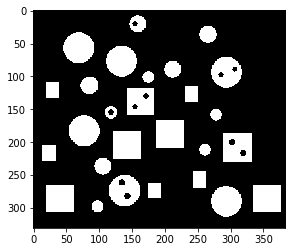

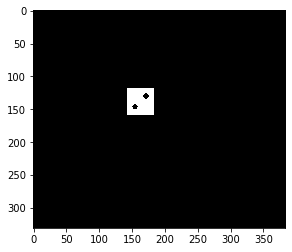

In [28]:
image=cv.imread('../images/objects.png',0)
(T,binary_image)=cv.threshold(image,128,255,cv.THRESH_BINARY)
plt.imshow(binary_image,cmap='gray')
plt.show()

binary_image=binary_image//255
n_binary_image=erosion(dialation(binary_image,4),4)


[twopass_image,clustermap]=TPA(binary_image)
[n_twopass_image,clustermap]=TPA(n_binary_image)

im_unique,im_count=np.unique(twopass_image,return_counts=True)
n_im_unique,n_im_count=np.unique(n_twopass_image,return_counts=True)

rect_holes=np.zeros(twopass_image.shape)

for i in range(im_unique.size):
    if im_unique[i]!=0:
        crdn=np.where(twopass_image==im_unique[i])
        rmin=np.min(crdn[0])
        rmax=np.max(crdn[0])
        cmin=np.min(crdn[1])
        cmax=np.max(crdn[1])
        
        if twopass_image[rmin,cmin]==im_unique[i]: #Implies a square 
#             print(rmax-rmin,cmax-cmin)
            if rmax-rmin==cmax-cmin: 
                if im_count[i]!=n_im_count[i]:
                    rect_holes[twopass_image==im_unique[i]]=1

plt.imshow(rect_holes,cmap='gray')

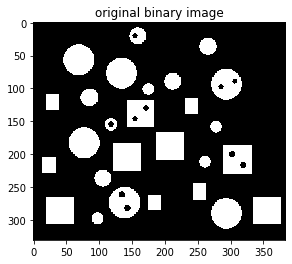

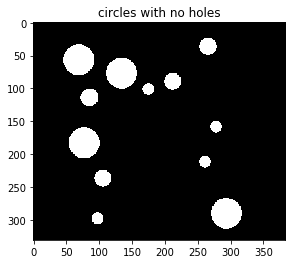

In [15]:
image=cv.imread('../images/objects.png',0)
(T,binary_image)=cv.threshold(image,128,255,cv.THRESH_BINARY)
plt.title("original binary image")
plt.imshow(binary_image,cmap='gray')
plt.show()

binary_image=binary_image//255
n_binary_image=erosion(dialation(binary_image,4),4)


[twopass_image,clustermap]=TPA(binary_image)
[n_twopass_image,clustermap]=TPA(n_binary_image)

im_unique,im_count=np.unique(twopass_image,return_counts=True)
n_im_unique,n_im_count=np.unique(n_twopass_image,return_counts=True)

circles=np.zeros(twopass_image.shape)

for i in range(im_unique.size):
    if im_unique[i]!=0:
        crdn=np.where(twopass_image==im_unique[i])
        rmin=np.min(crdn[0])
        rmax=np.max(crdn[0])
        cmin=np.min(crdn[1])
        cmax=np.max(crdn[1])
        
        if twopass_image[rmin,cmin]!=im_unique[i]: #Implies a circle 
            if im_count[i]==n_im_count[i]:
                circles[twopass_image==im_unique[i]]=1
plt.title("circles with no holes")
plt.imshow(circles,cmap='gray')